In [13]:
!pip install mysql.connector


Processing /root/.cache/pip/wheels/8c/83/a1/f8b6d4bb1bd6208bbde1608bbfa7557504bed9eaf2ecf8c175/mysql_connector-2.2.9-cp36-cp36m-linux_x86_64.whl


In [14]:
import mysql.connector as mysql
# For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport

# For Numerical Python
import numpy as np

# For Random Data
from random import randint

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import HTML
import plotly.express as px
# For scientific calculations
from scipy import stats

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import linear_model
from sklearn import gaussian_process
from sklearn import neural_network
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

In [15]:
con = mysql.connect(user='student', password='student', host='cpanel.insaid.co', database='Capstone2')

In [16]:
department_data = pd.read_sql("select * from department_data", con)                               
employee_details_data = pd.read_sql("select * from employee_details_data", con)
employee_data = pd.read_sql("select * from employee_data", con)
con.close()

In [17]:
department_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [18]:
department_data.describe()

,dept_id,dept_name,dept_head
count,11,11,11
unique,11,11,11
top,D00-FN,IT,Ellie Trafton
freq,1,1,1


In [19]:
department_data.isnull().sum()

dept_id      0
dept_name    0
dept_head    0
dtype: int64

In [20]:
department_data

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [21]:
employee_details_data.describe()

,employee_id,age
count,14245.000000,14245.000000
mean,112123.050544,32.889926
std,8500.457343,9.970834
min,100101.000000,22.000000
25%,105775.000000,24.000000
50%,111298.000000,29.000000
75%,116658.000000,41.000000
max,148988.000000,57.000000


In [22]:
employee_details_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [23]:
#getting duplicate entries 
duplicaterows_employee_details_data = employee_details_data[employee_details_data.duplicated()]
duplicaterows_employee_details_data.employee_id.count()

0

In [24]:
employee_details_data.isnull().sum()

employee_id       0
age               0
gender            0
marital_status    0
dtype: int64

In [25]:
employee_details_data.head(10)

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married
5,104555,22,Male,Unmarried
6,104706,51,Male,Married
7,118536,54,Male,Married
8,111712,43,Male,Married
9,119150,49,Male,Married


In [26]:
employee_details_data.groupby(['gender']).age.mean()

gender
Female    30.969360
Male      33.885419
Name: age, dtype: float64

In [27]:
employee_details_data.groupby(['marital_status','gender']).age.mean()

marital_status  gender
Married         Female    39.823769
                Male      42.058539
Unmarried       Female    23.575094
                Male      25.507662
Name: age, dtype: float64

In [28]:
employee_details_data.groupby(['gender']).age.count()

gender
Female    4863
Male      9382
Name: age, dtype: int64

In [29]:
employee_details_data.groupby(['marital_status','gender']).count()

employee_id   age
marital_status gender                   
Married        Female         2213  2213
               Male           4749  4749
Unmarried      Female         2650  2650
               Male           4633  4633

Observation for employee_details_data:
- No missing values in any columns
- __employee_id__ and __age__ are numeric and __gender__ and __marital_status__ are character types
- Male employees are almost double than female employees 
- Married employees are aged ~40 years where as unmarried employees aged ~24 years. 

In [30]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [31]:
#getting duplicate entries 
duplicaterows_employee_data = employee_data[employee_data.duplicated()]
duplicaterows_employee_data.employee_id.count()

29

In [32]:
employee_data = employee_data[~employee_data.duplicated()]
employee_data.employee_id.count()

14121

In [33]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14121 non-null  float64
 1   department         13414 non-null  object 
 2   filed_complaint    2041 non-null   float64
 3   last_evaluation    12634 non-null  float64
 4   n_projects         14121 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14121 non-null  object 
 7   satisfaction       13971 non-null  float64
 8   status             14121 non-null  object 
 9   tenure             13971 non-null  float64
 10  employee_id        14121 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


In [34]:
employee_data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,14121.000000,2041.0,12634.000000,14121.000000,297.0,13971.000000,13971.000000,14121.000000
mean,199.999929,1.0,0.718308,3.778132,1.0,0.621238,3.497745,112080.957793
std,50.832419,0.0,0.173079,1.249926,0.0,0.250502,1.460202,8754.097968
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000,0.000000
25%,155.000000,1.0,0.563605,3.000000,1.0,0.450314,3.000000,105767.000000
50%,199.000000,1.0,0.724484,4.000000,1.0,0.652517,3.000000,111289.000000
75%,245.000000,1.0,0.871334,5.000000,1.0,0.824800,4.000000,116654.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,148988.000000


In [35]:
employee_data.isnull().sum()

avg_monthly_hrs          0
department             707
filed_complaint      12080
last_evaluation       1487
n_projects               0
recently_promoted    13824
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
dtype: int64

In [36]:
employee_data.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707
5,135.0,D00-MT,NaN,0.482184,2,NaN,low,0.381545,Left,3.0,121685
6,270.0,D00-PD,NaN,0.867087,6,NaN,low,0.172575,Left,4.0,119912
7,244.0,D00-IT,NaN,0.926197,6,NaN,medium,0.061868,Left,5.0,112868
8,289.0,D00-IT,NaN,0.929858,7,NaN,low,0.161744,Left,4.0,122314
9,281.0,D00-SS,NaN,0.907965,6,NaN,medium,0.105749,Left,4.0,122394


Numerical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f364d341ef0>,
      dtype=object)

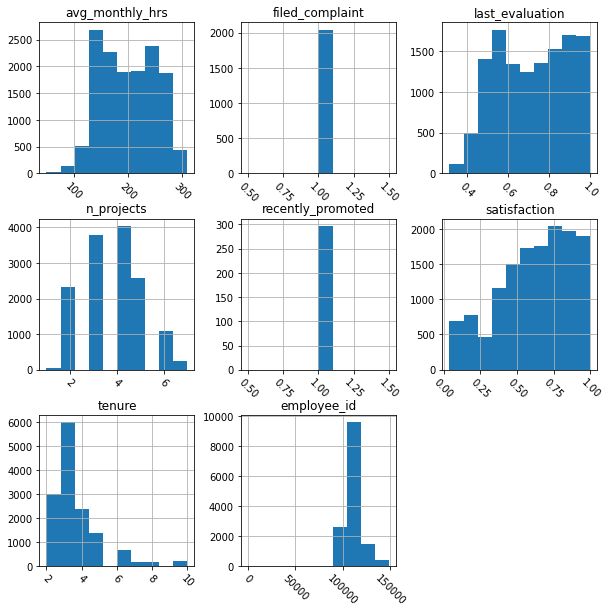

In [37]:
#histograms to get an idea of the distributions of our numerical features.
employee_data.hist(figsize=(10,10), xrot=-45)

Converting the NaN’s in filed_complaint and recently_promoted to 0. They were incorrectly labelled.

In [38]:
employee_data.filed_complaint.fillna(0,inplace=True)
employee_data.recently_promoted.fillna(0,inplace=True)

Create an indicator variable for the missing data in the last_evaluation feature, before converting the NaN’s to zero.

In [39]:
employee_data['last_evaluation_missing'] = employee_data.last_evaluation.isnull().astype(int)
employee_data.last_evaluation.fillna(0, inplace=True)

correlation heatmap for our numerical features.

# Categorical features

quick bar plots for our categorical features

In [40]:
employee_data.dtypes

avg_monthly_hrs            float64
department                  object
filed_complaint            float64
last_evaluation            float64
n_projects                   int64
recently_promoted          float64
salary                      object
satisfaction               float64
status                      object
tenure                     float64
employee_id                  int64
last_evaluation_missing      int64
dtype: object

-IT is should be D00-IT, so correcting it

In [41]:
employee_data.department.replace('-IT', 'D00-IT', inplace=True)

Joining employee_data with employee_details_data

In [42]:
employee_data = employee_data.merge(employee_details_data, on='employee_id',how= 'left')

In [43]:
employee_data.shape

(14121, 15)

In [44]:
employee_data[employee_data.age.isnull()]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status
34,284.0,D00-SS,0.0,0.852702,6,0.0,low,0.069168,Left,4.0,0,0,NaN,NaN,NaN
304,264.0,D00-ENG,0.0,0.774554,6,0.0,low,0.110974,Left,4.0,0,0,NaN,NaN,NaN
1234,129.0,D00-SP,0.0,0.402660,2,0.0,medium,0.437359,Left,3.0,0,0,NaN,NaN,NaN
11304,167.0,None,0.0,0.880053,5,0.0,low,0.682140,Employed,3.0,0,0,NaN,NaN,NaN
12304,259.0,D00-ENG,0.0,0.505883,5,0.0,low,0.631046,Employed,4.0,0,0,NaN,NaN,NaN


In [45]:
# age , gender and marital_status is having commoan rows with Nan, so dropping these rows
employee_data.dropna(subset=['age'],inplace=True)

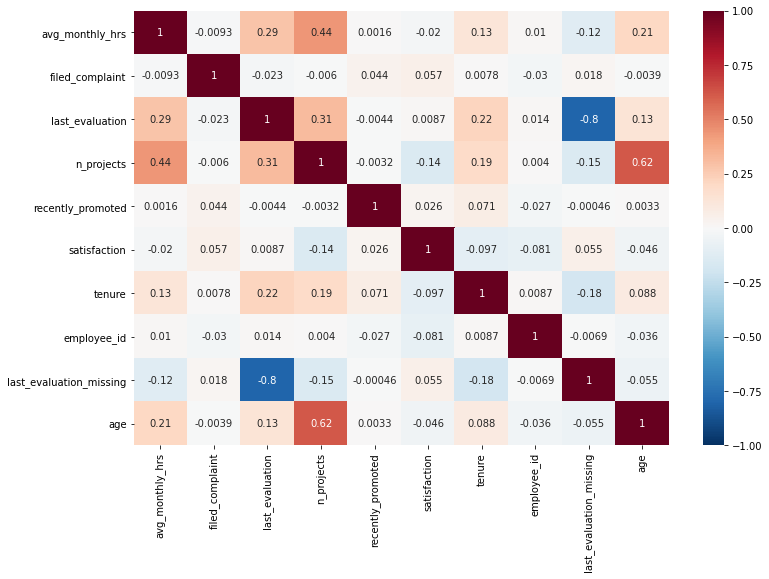

In [46]:
figure = plt.figure(figsize = [12, 8])
sns.heatmap(employee_data.corr(), annot=True, cmap='RdBu_r', vmin=-1, vmax=1)

In [47]:
employee_data[employee_data.tenure.isnull()].head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status
44,125.0,D00-TP,0.0,0.0,3,0.0,medium,NaN,Left,NaN,120360,1,24.0,Female,Unmarried
245,124.0,D00-TP,0.0,0.0,3,0.0,low,NaN,Left,NaN,116012,1,25.0,Female,Unmarried
251,119.0,D00-TP,0.0,0.0,2,0.0,medium,NaN,Left,NaN,116287,1,22.0,Female,Unmarried
414,126.0,D00-TP,0.0,0.0,2,0.0,low,NaN,Left,NaN,115235,1,24.0,Female,Unmarried
468,65.0,D00-TP,0.0,0.0,1,0.0,high,NaN,Left,NaN,122769,1,24.0,Female,Unmarried


In [48]:
employee_data[employee_data.tenure.isnull()][employee_data.marital_status=='Unmarried'].shape

(149, 15)

In [49]:
employee_data[employee_data.tenure.isnull()][employee_data.last_evaluation==0].shape

(150, 15)

- Looks like all the entries in satisfaction and tenure are belongs to department TP (temporary). All are unmarried except 1. None of them went through last_evaluation. These are nearly 1% of the total observations so better to dropping off them from evaluation

In [50]:
employee_data.dropna(subset=['tenure'],inplace=True)

In [51]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13966 entries, 0 to 14120
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avg_monthly_hrs          13966 non-null  float64
 1   department               13260 non-null  object 
 2   filed_complaint          13966 non-null  float64
 3   last_evaluation          13966 non-null  float64
 4   n_projects               13966 non-null  int64  
 5   recently_promoted        13966 non-null  float64
 6   salary                   13966 non-null  object 
 7   satisfaction             13966 non-null  float64
 8   status                   13966 non-null  object 
 9   tenure                   13966 non-null  float64
 10  employee_id              13966 non-null  int64  
 11  last_evaluation_missing  13966 non-null  int64  
 12  age                      13966 non-null  float64
 13  gender                   13966 non-null  object 
 14  marital_status        

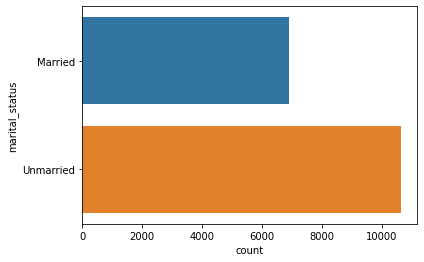

In [52]:
for feature in employee_data.dtypes[employee_data.dtypes=='object'].index:
    sns.countplot(data=employee_data, y='{}'.format(feature))

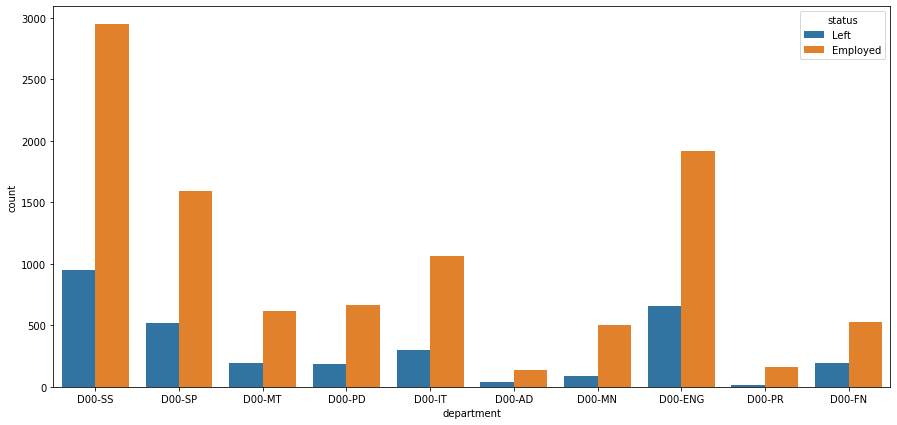

In [53]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='department',data=employee_data,hue='status')
plt.show()

Things to do to our categorical features to ensure the data will play nice with our algorithms:
- Missing data for the department feature should be lumped into its own Missing class.
- The gender, marital_status, department and salary categorical features should also be one-hot encoded.
- The target variable status should be converted to binary.

In [54]:
employee_data['department'].fillna('Missing', inplace=True)

In [55]:
department_data.rename(columns={'dept_id':'department'},inplace=True)

**Joining with department_data**

In [56]:
df = employee_data.merge(department_data, on='department',how= 'left')

In [57]:
df.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id', 'last_evaluation_missing', 'age', 'gender',
       'marital_status', 'dept_name', 'dept_head'],
      dtype='object')

dropping **department** and **dept_head** as these are just another represenation for dept_name

In [58]:
df.drop(columns=['department','dept_head'], inplace=True)

In [59]:
df.set_index('employee_id',inplace=True)

In [60]:
df = pd.get_dummies(df, columns=['dept_name', 'salary','gender',"marital_status"])

In [61]:
df['status'] = pd.get_dummies(df.status).Left

# Univariate Analysis

satisfaction vs status

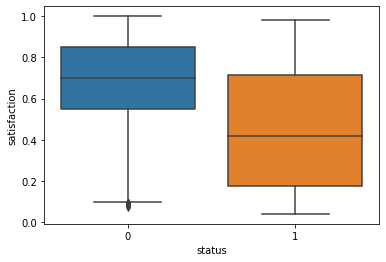

In [62]:
sns.boxplot(x="status", y="satisfaction", data=df)

- less satisfied are more likely to leave

last_evaluation vs status

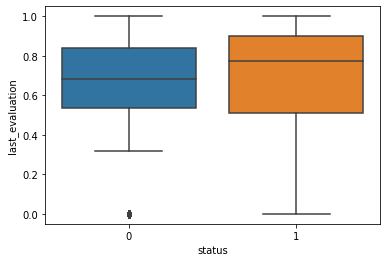

In [63]:
sns.boxplot(x="status", y="last_evaluation", data=df)

- Company was unable to relatin the high performer

avg_monthly_hrs and n_projects by **status**

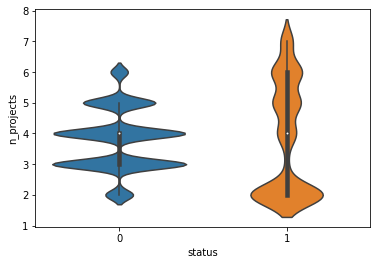

In [64]:
sns.violinplot(x="status", y="n_projects", data=df)

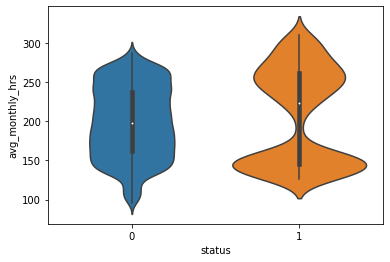

In [65]:
sns.violinplot(x="status", y="avg_monthly_hrs", data=df)

- Its very interesting but obvious that who are left were either having high work load or lesser work load

tenure by status


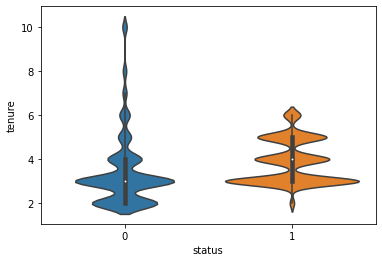

In [66]:
sns.violinplot(x="status", y="tenure", data=df)

It can be noted that majority of employee switch their job at the 3rd year. Those who are still around after 6 years tend to stay

# Bivariate Analysis

Pairplot

**Performance** and **satisfaction**

In [67]:
#sns.pairplot(employee_data,hue='status',diag_kind='kde')

In [68]:
#sns.lmplot(x='satisfaction',y='last_evaluation', data=df, hue = 'status',fit_reg=False )
df.sort_values('status', ascending=True, inplace=True)
fig = px.scatter(df, x="satisfaction", y="last_evaluation",color='status',width=600, height=600)
fig.show()

We can see three clusters of the employees attrition:
- Underachiever: last_evaluation < 0.6
- Unsatisfied: satisfaction_level < 0.2
- Overachievers: last_evaluation > 0.8 and satisfaction > 0.7

**Workload** and **performance**

In [69]:
#sns.lmplot(x='avg_monthly_hrs',y='last_evaluation', data=df, hue = 'status',fit_reg=False )
fig = px.scatter(df, x="avg_monthly_hrs", y="last_evaluation",color='status',width=600, height=600)
fig.show()

We have two clusters of the employees attrition:
- Performer: avg_monthly_hrs > 215 and last_evaluation > 0.75
- Non-performer: avg_monthly_hrs < 165 and last_evaluation < 0.65

**Workload** and **Satisfaction**:

In [70]:
#sns.lmplot(x='avg_monthly_hrs',y='satisfaction', data=df, hue = 'status',fit_reg=False )
fig = px.scatter(df, x="avg_monthly_hrs", y="satisfaction",color='status',width=600, height=600)
fig.show()

We have three clusters of employees attrition:
- Workaholics: avg_monthly_hrs > 210 and satisfation > 0.7
- Average: avg_monthly_hrs < 170
- Overloaded: avg_monthly_hrs > 225 and satisfaction < 0.2

# Feature Engineering:

In [71]:
df['underachiever'] = ((df.last_evaluation < 0.6) & (df.last_evaluation_missing==0)).astype(int)
df['unsatisfied'] = (df.satisfaction < 0.2).astype(int)
df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)
df['performer'] = ((df.avg_monthly_hrs > 215) & (df.last_evaluation > 0.75)).astype(int)
df['nonperformer'] = ((df.avg_monthly_hrs < 165) & (df.last_evaluation < 0.65) & (df.last_evaluation_missing==0)).astype(int)
df['workaholic'] = ((df.avg_monthly_hrs > 210) & (df.satisfaction > 0.7)).astype(int)
df['average'] = (df.avg_monthly_hrs < 170).astype(int)
df['overloaded'] = ((df.avg_monthly_hrs > 225) & (df.satisfaction < 0.2)).astype(int)

In [72]:
df[['underachiever', 'unsatisfied', 'overachiever', 'performer', 
    'nonperformer', 'workaholic', 'average', 'overloaded']].mean()

underachiever    0.285622
unsatisfied      0.092081
overachiever     0.176786
performer        0.241444
nonperformer     0.167765
workaholic       0.226479
average          0.339038
overloaded       0.071531
dtype: float64

# Data Preparation

Preparing X and y using pandas

In [73]:
y = df.status
X = df.drop('status', axis=1)

Scaling using Standard Scaler

In [74]:
df.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,age,dept_name_Admin,dept_name_Engineering,dept_name_Finance,dept_name_IT,dept_name_Management,dept_name_Marketing,dept_name_Procurement,dept_name_Product,dept_name_Sales,dept_name_Support,salary_high,salary_low,salary_medium,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,underachiever,unsatisfied,overachiever,performer,nonperformer,workaholic,average,overloaded
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
112632,144.0,0.0,0.000000,3,0.0,0.524703,0,2.0,1,25.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
112612,230.0,0.0,0.941093,6,0.0,0.523895,0,4.0,0,47.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0
101619,148.0,0.0,0.982293,3,0.0,0.599732,0,3.0,0,23.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
147090,182.0,0.0,0.605378,2,0.0,0.422628,0,2.0,0,24.0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
109672,247.0,0.0,0.478702,3,0.0,0.874076,0,2.0,0,23.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0


In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale= scaler.fit_transform(X)
X_scale= pd.DataFrame(X_scale, columns=X.columns)
X_scale.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing,age,dept_name_Admin,dept_name_Engineering,dept_name_Finance,dept_name_IT,dept_name_Management,dept_name_Marketing,dept_name_Procurement,dept_name_Product,dept_name_Sales,dept_name_Support,salary_high,salary_low,salary_medium,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,underachiever,unsatisfied,overachiever,performer,nonperformer,workaholic,average,overloaded
0,-1.142627,-0.410258,-2.424943,-0.648055,-0.147404,-0.385778,-1.025561,3.073398,-0.798788,-0.112647,-0.475227,-0.233485,3.045763,-0.210021,-0.248456,-0.111994,-0.255049,-0.621896,-0.421628,-0.29699,-0.977624,1.150730,-0.721931,0.721931,-0.988750,0.988750,-0.632313,-0.318464,-0.463413,-0.564175,-0.44898,-0.541100,1.396254,-0.277564
1,0.579174,-0.410258,1.088378,1.780585,-0.147404,-0.389004,0.343946,-0.325373,1.403339,-0.112647,-0.475227,4.282930,-0.328325,-0.210021,-0.248456,-0.111994,-0.255049,-0.621896,-0.421628,-0.29699,1.022888,-0.869013,-0.721931,0.721931,1.011378,-1.011378,-0.632313,-0.318464,-0.463413,1.772500,-0.44898,-0.541100,-0.716202,-0.277564
2,-1.062543,-0.410258,1.242188,-0.648055,-0.147404,-0.086203,-0.340808,-0.325373,-0.998981,-0.112647,-0.475227,-0.233485,-0.328325,-0.210021,-0.248456,8.929072,-0.255049,-0.621896,-0.421628,-0.29699,1.022888,-0.869013,1.385173,-1.385173,-0.988750,0.988750,-0.632313,-0.318464,-0.463413,-0.564175,-0.44898,-0.541100,1.396254,-0.277564
3,-0.381831,-0.410258,-0.164925,-1.457601,-0.147404,-0.793342,-1.025561,-0.325373,-0.898885,-0.112647,-0.475227,-0.233485,-0.328325,-0.210021,-0.248456,-0.111994,3.920816,-0.621896,-0.421628,-0.29699,-0.977624,1.150730,1.385173,-1.385173,-0.988750,0.988750,-0.632313,-0.318464,-0.463413,-0.564175,-0.44898,-0.541100,-0.716202,-0.277564
4,0.919530,-0.410258,-0.637836,-0.648055,-0.147404,1.009195,-1.025561,-0.325373,-0.998981,-0.112647,-0.475227,-0.233485,-0.328325,-0.210021,-0.248456,-0.111994,-0.255049,-0.621896,2.371758,-0.29699,-0.977624,1.150730,-0.721931,0.721931,-0.988750,0.988750,1.581496,-0.318464,-0.463413,-0.564175,-0.44898,1.848088,-0.716202,-0.277564


Splitting X and y into training and test datasets

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scale,y,test_size = 0.3, random_state = 1)
print('Train cases as below')
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
x_train shape:  (9776, 34)
y_train shape:  (9776,)

Test cases as below
x_test shape:  (4190, 34)
y_test shape:  (4190,)


# Modelling and Prediction

In [77]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['Left', 'Employed']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [78]:
def accuracy(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import accuracy_score
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_preds)
    return accuracy

5.1 Logistic Regression

In [79]:
model_LR=LogisticRegression()
classify(model_LR,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

        Left     0.9370    0.9329    0.9349      3187
    Employed     0.7896    0.8006    0.7950      1003

    accuracy                         0.9012      4190
   macro avg     0.8633    0.8667    0.8650      4190
weighted avg     0.9017    0.9012    0.9014      4190



#### <a id=section502></a>
### 5.2 Decision Tree

In [80]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='black', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=8)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]       

Lowest error is 0.051073985680190934 occurs at n=9.


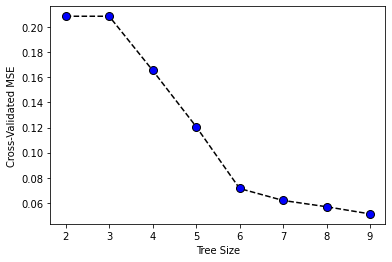

In [81]:
n=dt_error(10,x_train,y_train,x_test,y_test)

In [82]:
model_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(model_DT,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

        Left     0.9570    0.9768    0.9668      3187
    Employed     0.9210    0.8604    0.8897      1003

    accuracy                         0.9489      4190
   macro avg     0.9390    0.9186    0.9282      4190
weighted avg     0.9484    0.9489    0.9483      4190



#### <a id=section503></a>
### 5.3 Random Forest

In [83]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='black', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.023627684964200476 occurs at n=21.


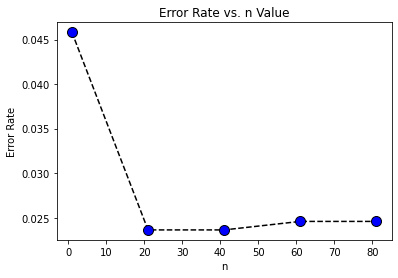

In [84]:
e=rf_error(100,x_train,y_train,x_test,y_test)

In [85]:
model_RF=ensemble.RandomForestClassifier(n_estimators = e)
classify(model_RF,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

        Left     0.9759    0.9912    0.9835      3187
    Employed     0.9706    0.9222    0.9458      1003

    accuracy                         0.9747      4190
   macro avg     0.9733    0.9567    0.9647      4190
weighted avg     0.9746    0.9747    0.9745      4190



#### <a id=section504></a>
### 5.4 K-Nearest Neighbors

In [86]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='black', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.0675417661097852 occurs at k=2.


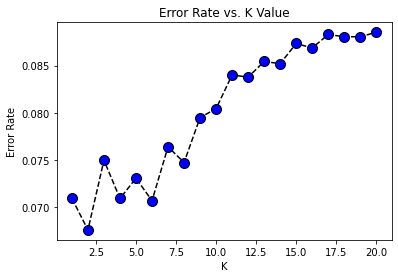

In [87]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [88]:
model_KNN = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model_KNN,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

        Left     0.9408    0.9724    0.9563      3187
    Employed     0.9018    0.8056    0.8510      1003

    accuracy                         0.9325      4190
   macro avg     0.9213    0.8890    0.9037      4190
weighted avg     0.9315    0.9325    0.9311      4190



#### <a id=section505></a>
### 5.5 Gaussian Naive Bayes

In [89]:
model_NB=naive_bayes.GaussianNB()
classify(model_NB,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

        Left     0.9197    0.8268    0.8708      3187
    Employed     0.5834    0.7707    0.6641      1003

    accuracy                         0.8134      4190
   macro avg     0.7516    0.7987    0.7674      4190
weighted avg     0.8392    0.8134    0.8213      4190



#### <a id=section506></a>
### 5.6 Support Vector Machine

In [90]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [91]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='black', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [92]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.962152209492635
rbf  out-of-sample accuracy in SVM:  0.9558472553699284
poly  in-sample accuracy in SVM:  0.9654255319148937
poly  out-of-sample accuracy in SVM:  0.9594272076372315
linear  in-sample accuracy in SVM:  0.9138707037643208
linear  out-of-sample accuracy in SVM:  0.9069212410501193
Highest accuracy is 0.9594272076372315 occurs at poly kernel.


Lowest error is 0.0405727923627685 occurs at C=1.


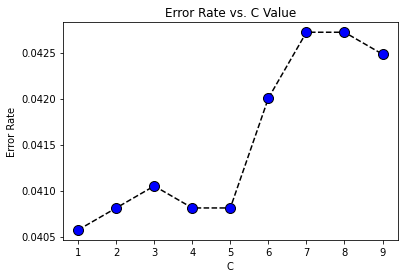

In [93]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [94]:
model_SVM=svm.SVC(kernel=k,C=c)
classify(model_SVM,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

        Left     0.9680    0.9790    0.9735      3187
    Employed     0.9307    0.8973    0.9137      1003

    accuracy                         0.9594      4190
   macro avg     0.9494    0.9381    0.9436      4190
weighted avg     0.9591    0.9594    0.9592      4190



Neural 

In [95]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]


Lowest error is 0.03293556085918854 occurs at C=14.


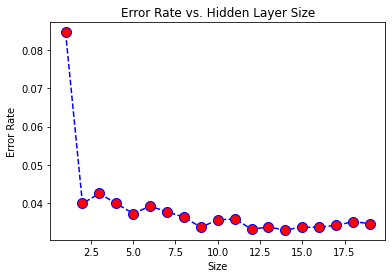

In [96]:
h=nn_error(20,x_train,y_train,x_test,y_test)

In [119]:
h

14

In [98]:
model_NN = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model_NN,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

        Left     0.9745    0.9824    0.9784      3187
    Employed     0.9427    0.9182    0.9303      1003

    accuracy                         0.9671      4190
   macro avg     0.9586    0.9503    0.9544      4190
weighted avg     0.9669    0.9671    0.9669      4190



[Back to Top](#section0)</br>

#### <a id=section6></a>
## 6. Model Comparison using Accuracy Score

In [99]:
Classifiers = [['LogisticRegression', model_LR],
              ['DecisionTree',model_DT],
              ['RandomForest',model_RF],
              ['KNeighbours',model_KNN],
              ['NaiveBays',model_NB],
              ['SVM', model_SVM],
              ['Neural Network',model_NN]]

In [100]:
for name,model in Classifiers:
    print('Accuracy score for the {} is: {}'.format(name,accuracy(model,x_train,y_train,x_test,y_test)))

Accuracy score for the LogisticRegression is: 0.9011933174224344
Accuracy score for the DecisionTree is: 0.948926014319809
Accuracy score for the RandomForest is: 0.9732696897374702
Accuracy score for the KNeighbours is: 0.9324582338902148
Accuracy score for the NaiveBays is: 0.813365155131265
Accuracy score for the SVM is: 0.9594272076372315
Accuracy score for the Neural Network is: 0.9670644391408114


<a id=section7></a>
## 7. Improving the model using feature_selection from sklearn

In [101]:
from sklearn.feature_selection import SelectKBest, f_classif

def select_kbest_clf(df, target, k=5):
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(df.drop(target, axis=1), df[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = df.drop(target, axis=1).columns
    
    return feat_scores
Table=select_kbest_clf(df, 'status', k=5).sort_values(['F Score'],ascending=False)

print(Table)

        F Score        P Value  Support                 Attribute
33  2554.559853   0.000000e+00     True                overloaded
5   2477.356028   0.000000e+00     True              satisfaction
29  1656.338669   0.000000e+00     True                 performer
27  1605.863376   0.000000e+00     True               unsatisfied
30  1408.689569  8.304001e-294     True              nonperformer
1    357.725717   8.483989e-79    False           filed_complaint
6    288.964139   3.690781e-64    False                    tenure
20   257.137205   2.346258e-57    False                salary_low
32   254.778580   7.503697e-57    False                   average
22   204.346616   4.966405e-46    False             gender_Female
23   204.346616   4.966405e-46    False               gender_Male
19   202.554916   1.206102e-45    False               salary_high
26   192.262654   1.977971e-43    False             underachiever
28   115.137734   9.334339e-27    False              overachiever
25    92.6

Text(0.5, 1.0, 'Feature Importance')

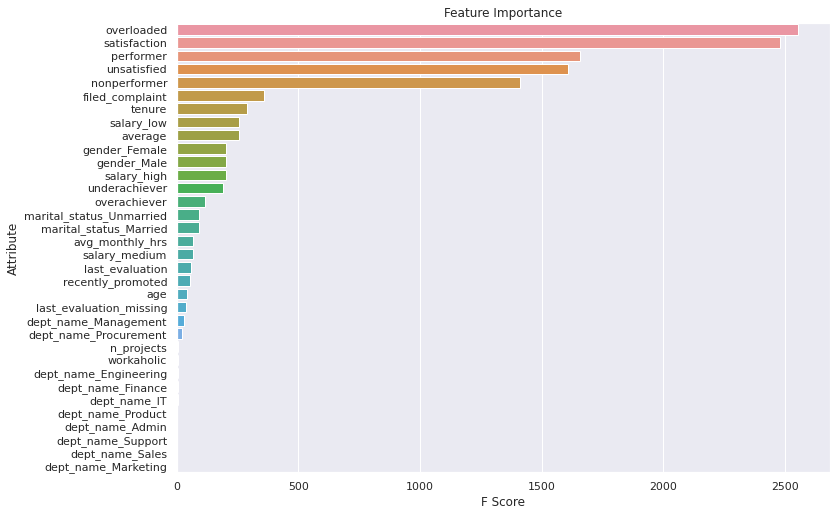

In [102]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
p=sns.barplot(x=Table['F Score'],y=Table['Attribute'])
p.set_title('Feature Importance')


#### Feature selection

In [103]:
df1=df[['overloaded','satisfaction','performer','unsatisfied','nonperformer','filed_complaint','tenure','salary_low','average','status']]

#### Preparing X and y using pandas

In [104]:
X = df1.drop(['status'], axis = 1)
y = df1['status']

#### Scaling using Standard Scaler

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale= scaler.fit_transform(X)
X_scale= pd.DataFrame(X_scale, columns=X.columns)
X_scale.head()

,overloaded,satisfaction,performer,unsatisfied,nonperformer,filed_complaint,tenure,salary_low,average
0,-0.277564,-0.385778,-0.564175,-0.318464,-0.44898,-0.410258,-1.025561,-0.977624,1.396254
1,-0.277564,-0.389004,1.772500,-0.318464,-0.44898,-0.410258,0.343946,1.022888,-0.716202
2,-0.277564,-0.086203,-0.564175,-0.318464,-0.44898,-0.410258,-0.340808,1.022888,1.396254
3,-0.277564,-0.793342,-0.564175,-0.318464,-0.44898,-0.410258,-1.025561,-0.977624,-0.716202
4,-0.277564,1.009195,-0.564175,-0.318464,-0.44898,-0.410258,-1.025561,-0.977624,-0.716202


#### Splitting X and y into training and test datasets

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scale,y,test_size = 0.3, random_state = 1)

#### Logistic Regression

In [107]:
model_LR=LogisticRegression()

#### Decision Tree

Lowest error is 0.07613365155131264 occurs at n=9.


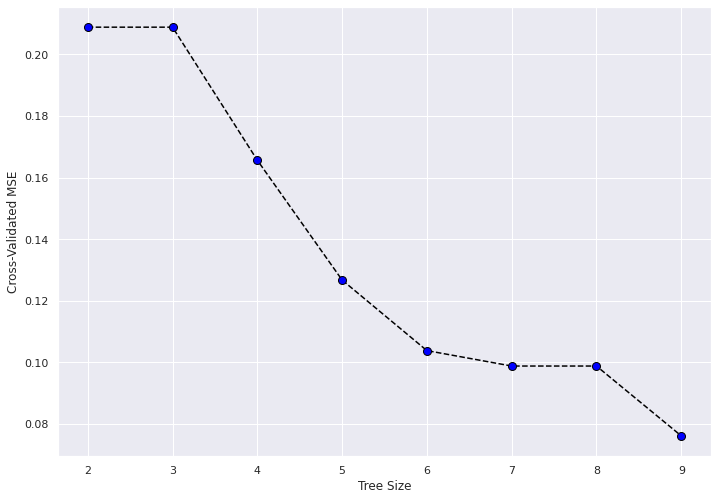

In [108]:
n=dt_error(10,x_train,y_train,x_test,y_test)
model_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)

#### Random Forest

Lowest error is 0.05799522673031026 occurs at n=81.


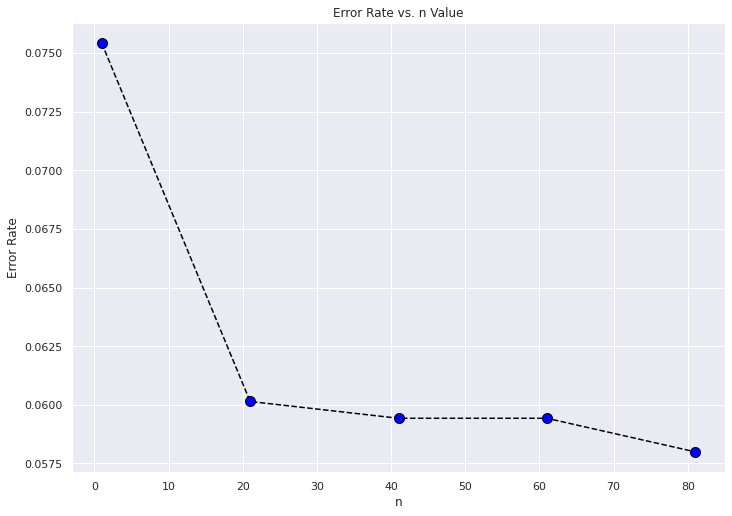

In [109]:
e=rf_error(100,x_train,y_train,x_test,y_test)
model_RF=ensemble.RandomForestClassifier(n_estimators = e)

#### KNN

Lowest error is 0.044391408114558474 occurs at k=8.


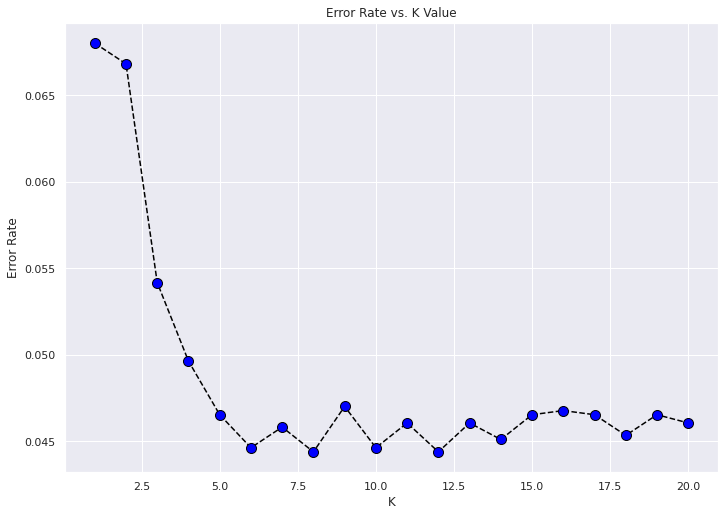

In [110]:
k=knn_error(21,x_train,y_train,x_test,y_test)
model_KNN = neighbors.KNeighborsClassifier(n_neighbors = k)

#### Gaussian Naive Bayes

In [111]:
model_NB=naive_bayes.GaussianNB()

#### Support Vector Machine

rbf  in-sample accuracy in SVM:  0.9339198036006546
rbf  out-of-sample accuracy in SVM:  0.9331742243436754
poly  in-sample accuracy in SVM:  0.9351472995090017
poly  out-of-sample accuracy in SVM:  0.931980906921241
linear  in-sample accuracy in SVM:  0.8539279869067103
linear  out-of-sample accuracy in SVM:  0.8510739856801909
Highest accuracy is 0.9331742243436754 occurs at rbf kernel.
Lowest error is 0.051073985680190934 occurs at C=9.


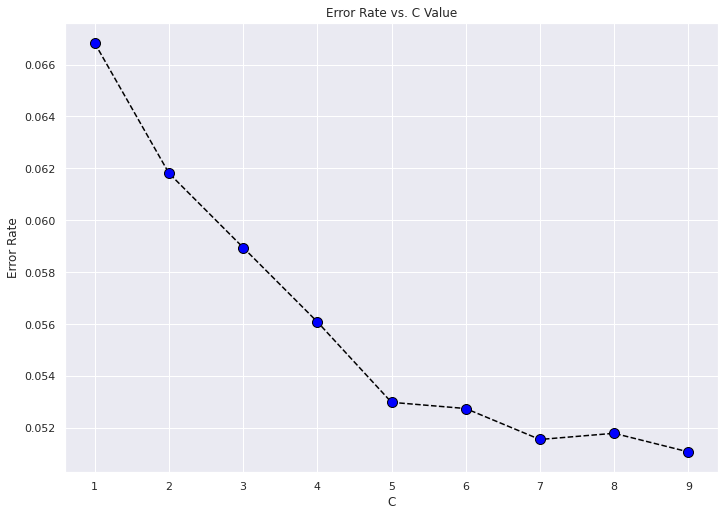

In [112]:
k=svm_kernel(x_train,y_train,x_test,y_test)
c=svm_error(k,10,x_train,y_train,x_test,y_test)
model_SVM=svm.SVC(kernel=k,C=c)

In [113]:
for name,model in Classifiers:
    print('Accuracy score for the {} is: {}'.format(name,accuracy(model,x_train,y_train,x_test,y_test)))

Accuracy score for the LogisticRegression is: 0.8513126491646779
Accuracy score for the DecisionTree is: 0.9238663484486873
Accuracy score for the RandomForest is: 0.9415274463007159
Accuracy score for the KNeighbours is: 0.9331742243436754
Accuracy score for the NaiveBays is: 0.8522673031026253
Accuracy score for the SVM is: 0.931980906921241
Accuracy score for the Neural Network is: 0.9575178997613365


# Using model on unseen data to predit the Target variable

In [114]:
!pip install --upgrade gspread

Requirement already up-to-date: gspread in /usr/local/lib/python3.6/dist-packages (3.6.0)


In [115]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('GCD_Capstone_Project').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
newdata = pd.DataFrame.from_records(rows)

[['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'tenure', 'employee_id'], ['134', 'D00-IT', '', '0.528841135', '2', '', 'low', '0.4004640146', '3', '119045'], ['221', 'D00-PD', '', '0.78456091', '2', '', 'low', '0.7595131562', '3', '112223'], ['156', 'D00-SS', '', '0.5451831253', '2', '', 'medium', '0.3364573114', '3', '103924'], ['133', 'D00-PR', '', '', '4', '', 'medium', '0.8320388898', '2', '105922'], ['135', 'D00-SS', '', '0.4546373587', '2', '', 'low', '0.3207231912', '5', '103297'], ['157', 'D00-FN', '', '0.5707667431', '4', '', 'low', '0.8104827119', '3', '115525'], ['153', 'D00-MT', '', '0.6752630714', '2', '', 'low', '0.6114116001', '3', '116409'], ['264', 'D00-PD', '1', '', '4', '', 'low', '0.4455563739', '2', '109427'], ['179', 'D00-FN', '', '', '5', '', 'low', '0.5343356593', '3', '118590'], ['169', 'D00-MT', '', '0.7823102696', '3', '', 'low', '0.9490860486', '3', '107075'], ['115', 'D00

In [116]:
newdata.head()

,0,1,2,3,4,5,6,7,8,9
0,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
1,134,D00-IT,,0.528841135,2,,low,0.4004640146,3,119045
2,221,D00-PD,,0.78456091,2,,low,0.7595131562,3,112223
3,156,D00-SS,,0.5451831253,2,,medium,0.3364573114,3,103924
4,133,D00-PR,,,4,,medium,0.8320388898,2,105922


In [118]:
newDF = newdata.merge(department_data, on='department',how= 'left')

KeyError: ignored

[Back to Top](#section0)</br>

<a id=section8></a>
## 8. Conclusion 
